# 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Handling missing values:

In [2]:
data = pd.read_csv('/content/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
missing_count = data.isnull().sum()
missing_count

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


We need to figure out why the value is misssing
To do so you can ask yourself a question:

Is this value missing becuase it wasn't recorded or becuase it doesn't exist?

Examples:
I notice that the column **Cabin** has a lot of missing values

These values are probably missing because they were not recorded, rather than because they don't exist.
So, it would make sense for us to try and guess what they should be rather than just leaving them as NA's

In [5]:
print(missing_count["Cabin"])

687


On the other hand, there are other fields, like **Age** that also have lot of missing fields.

For this column, it would make more sense to either leave it empty or to add a third value like "neither" and use that to replace the NA's.

In [6]:
print(missing_count["Age"])

177


### Solution 1: Drop missing values (Not recommended)

If you don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values.

Let's try to remove all rows that contain null values

In [7]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


It looks like that's removed a lot from your data !!

Let's try to remove all columns that contain null values.

In [8]:
data.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


It's clearly shows we missed a lot of information that could be important in our problem !!

### Solution 2: Filling the missing values - Imputation

The possible ways to do this are:
1. Filling the missing data with the mean or median if it's a numerical variable.

2. Filling the missing data with mode if it's a categorical values.

3. Filling the categorical value with a new type for the missing values.

 ### 1. Filling the missing data with the mean or median if it's a numerical variable.

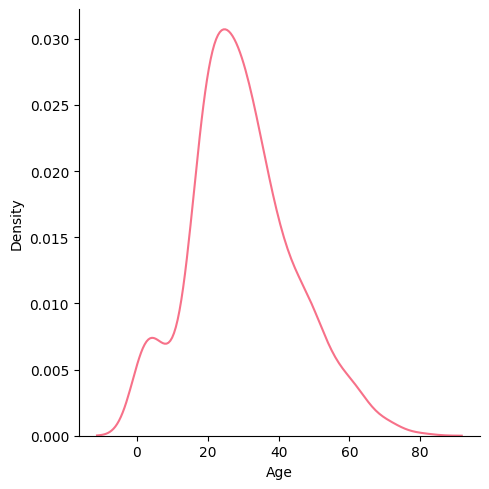

In [9]:
sns.set_palette("husl")
sns.displot(data=data, x="Age", kind="kde")

In [10]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

<ipython-input-10-fa7e412865bd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(), inplace=True)


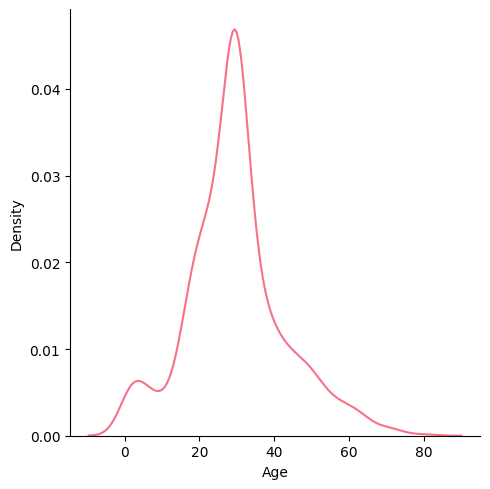

In [11]:
sns.set_palette("husl")
sns.displot(data=data, x="Age", kind="kde")

Depending  on the volume of missingness, imputing in this way can also affect the true relationship between columns.
If the column has many outliers, then median imputation should be preferred over mean imputation.

### 2. Filling the missing data with mode if it's a categorical values.

<Axes: xlabel='Embarked', ylabel='count'>

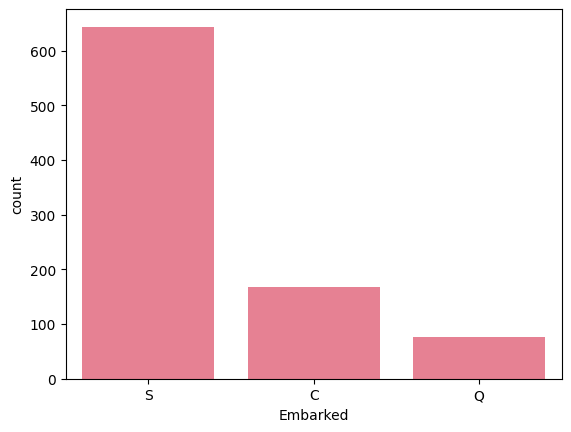

In [12]:
sns.countplot(data=data, x="Embarked")

In [16]:
data["Embarked"].mode()[0]

'S'

In [18]:
data["Embarked"].isnull().sum()

2

In [19]:
replace_mode = data.copy()

In [20]:
replace_mode["Embarked"].fillna(replace_mode["Embarked"].mode()[0], inplace=True)

<ipython-input-20-c0371146dfdd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  replace_mode["Embarked"].fillna(replace_mode["Embarked"].mode()[0], inplace=True)


In [21]:
replace_mode["Embarked"].isnull().sum()

0

<Axes: xlabel='Embarked', ylabel='count'>

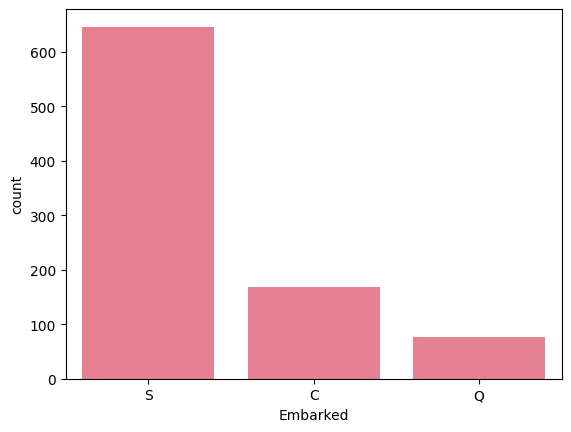

In [22]:
sns.countplot(data=replace_mode, x="Embarked")

Try to fill it randomly

In [ ]:
fill_list = ["S", "C", "Q"]
data["Embarked"] = data["Embarked"].fillna(pd.Series(np.random.choice(fill_list, size=len(data.index))))

<Axes: xlabel='Embarked', ylabel='count'>

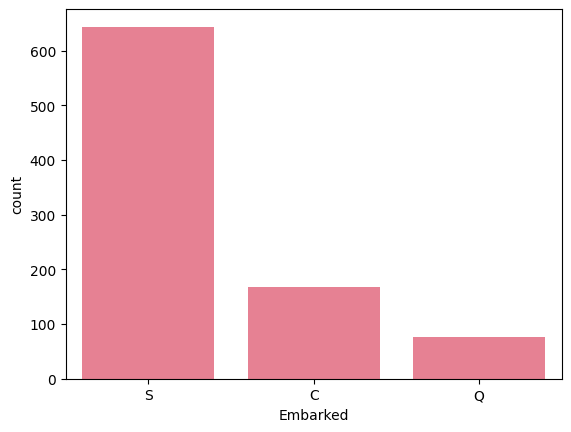

In [23]:
sns.countplot(data=data, x="Embarked")

### 3. Filling the categorical value with a new type for the missing values.

In [24]:
data["Cabin"].fillna("Unknown", inplace=True)

<ipython-input-24-a2de06d7dd8b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cabin"].fillna("Unknown", inplace=True)


In [25]:
data["Cabin"].isnull().sum()

0

### 2. Identify & handing outliers

One of the easiest ways to see if your our dataset has outliers is to plot it.

Use boxplot to check outliers

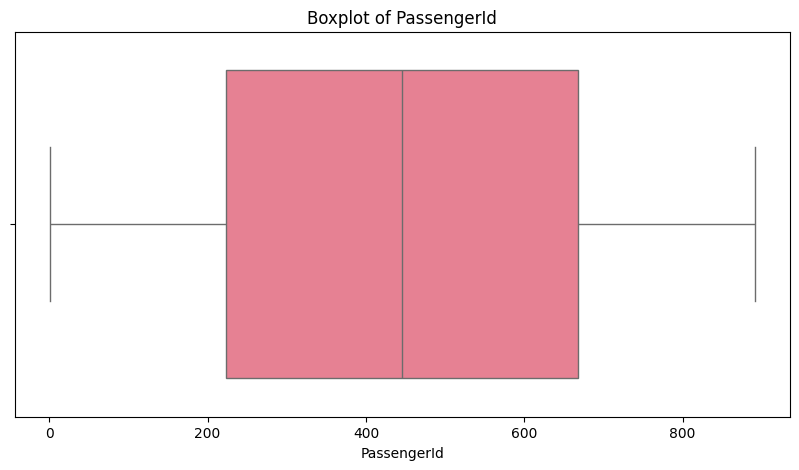

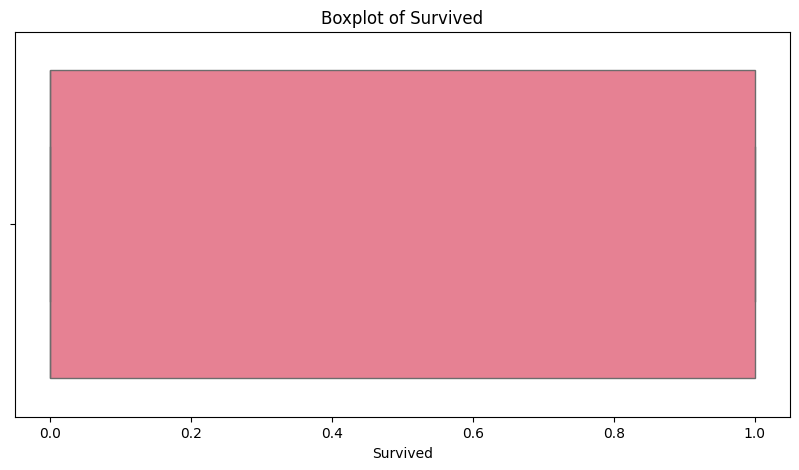

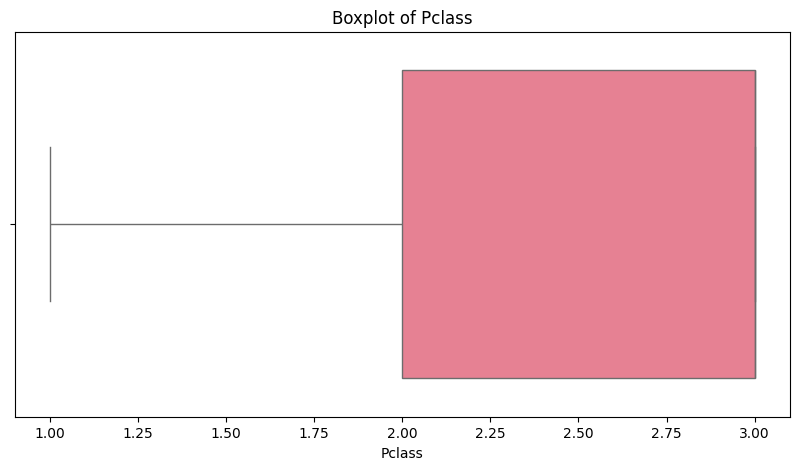

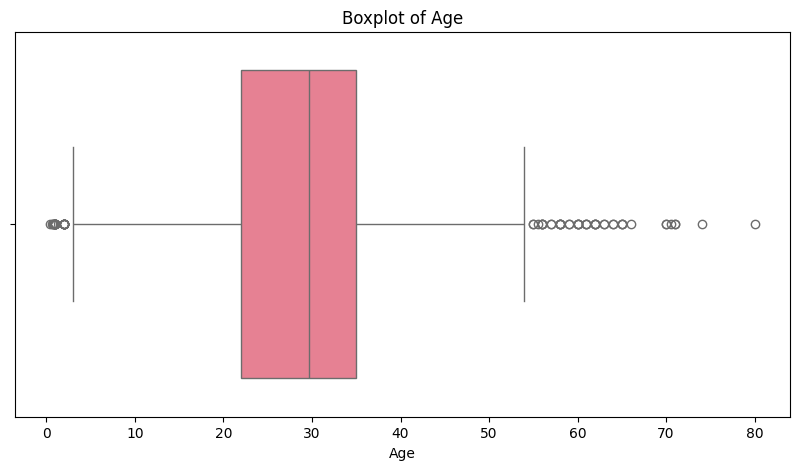

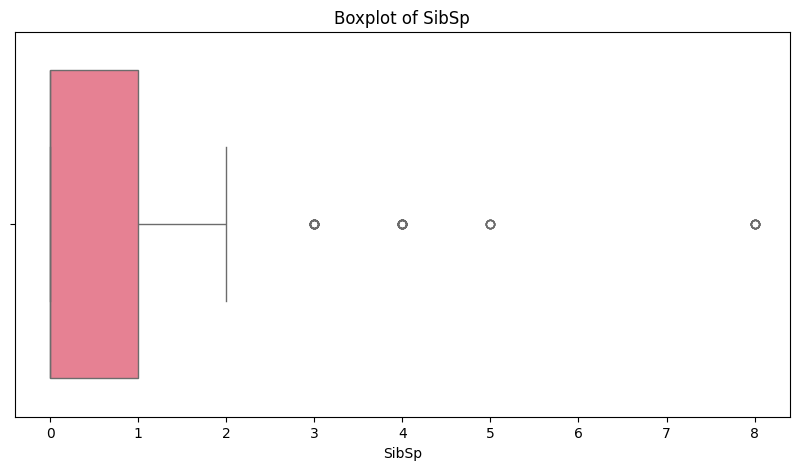

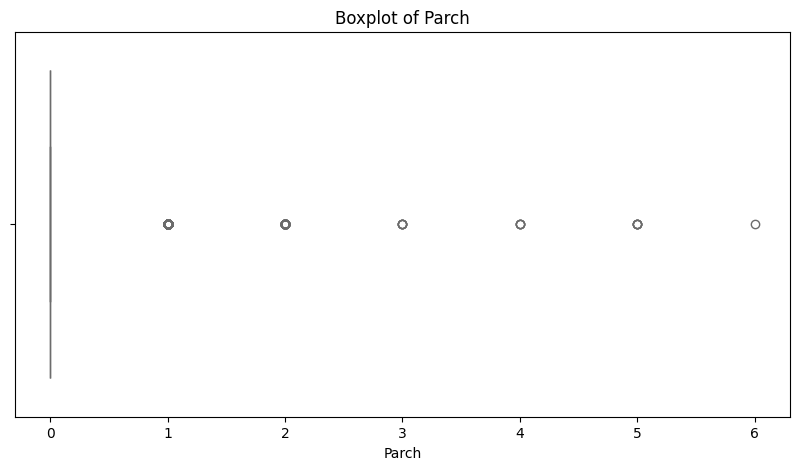

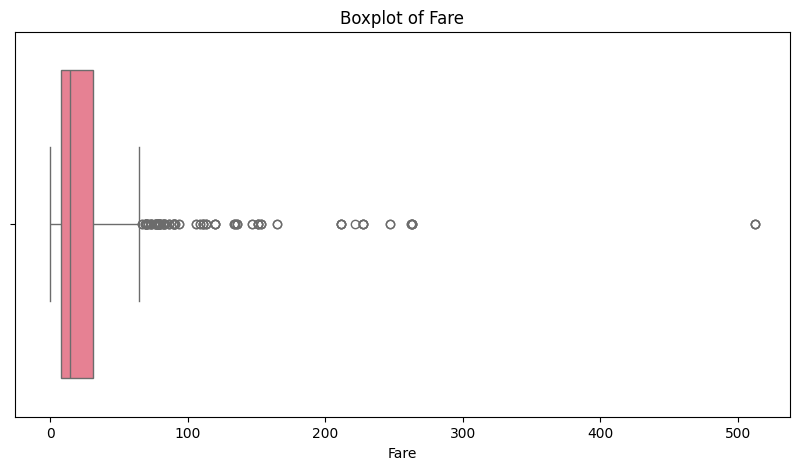

In [27]:
for col in data.columns:
    if data[col].dtypes != "object":
      fig, ax = plt.subplots(figsize=(10, 5))
      ax.set_title(f'Boxplot of {col}')
      bp = sns.boxplot(data=data, x=col)
      plt.show()

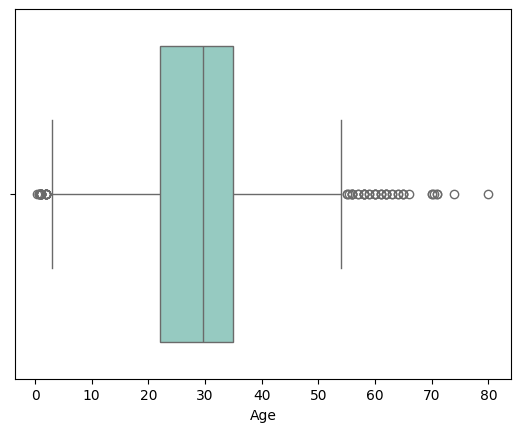

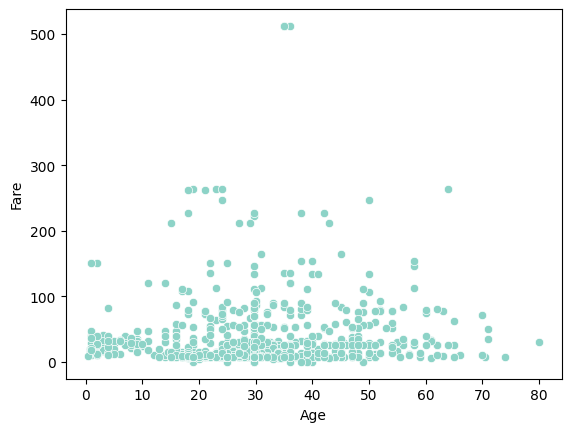

In [28]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "Age")
plt.show()
sp = sns.scatterplot(data = data, x = "Age", y = "Fare")
plt.show()

In [30]:
data.drop(data[data["Age"] > 70].index, inplace=True)

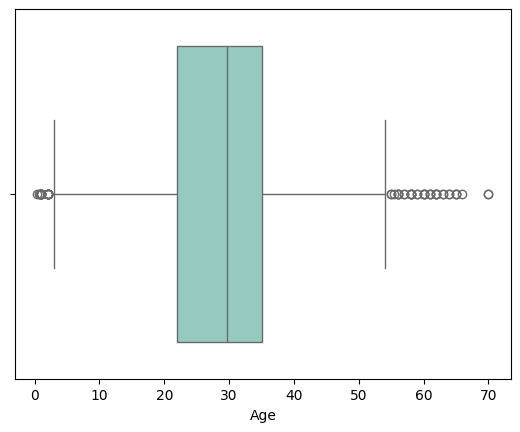

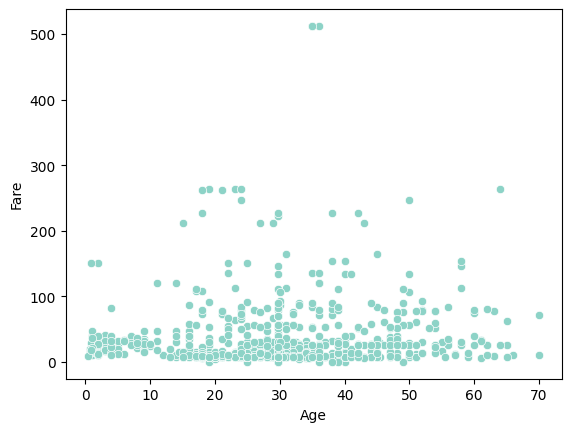

In [31]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "Age")
plt.show()
sp = sns.scatterplot(data = data, x = "Age", y = "Fare")
plt.show()

### 3. Scaleand Normalize data

Example: Min-Max Scaling:

In [32]:
from sklearn.preprocessing import MinMaxScaler

df = np.random.exponential(size=1000).reshape(-1, 1)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

<ipython-input-33-59e9209d0744>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, ax=ax[0])
<ipython-input-33-59e9209d0744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled, ax=ax[1])


Text(0.5, 1.0, 'Scaled Data')

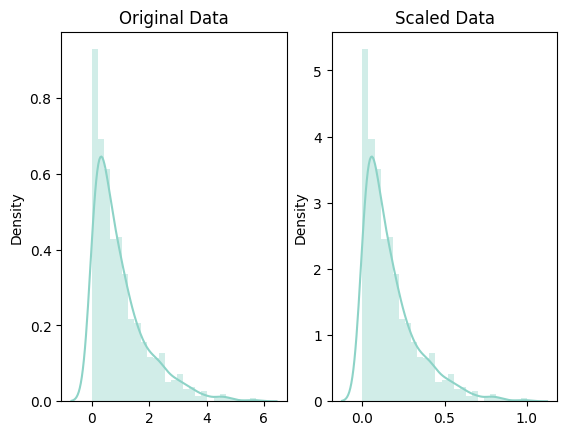

In [33]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(df_scaled, ax=ax[1])
ax[1].set_title('Scaled Data')

### 4. Remove Duplicates:

In [34]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 5. Dealing with Categorical data:

In [35]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])
data["Cabin"] = le.fit_transform(data["Cabin"])
data["Ticket"] = le.fit_transform(data["Ticket"])

In [37]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,int64
Fare,float64


In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(data[["Cabin"]]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["Cabin"]))
data = pd.concat([data, encoded_df], axis=1)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_136,Cabin_137,Cabin_138,Cabin_139,Cabin_140,Cabin_141,Cabin_142,Cabin_143,Cabin_144,Cabin_145
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,520.0,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,593.0,71.2833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,664.0,7.9250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,49.0,53.1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,469.0,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
